# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [56]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
from scipy import stats
from config import weather_api_key, g_key
from citipy import citipy
from pprint import pprint

## Generate Cities List

In [2]:
path = '../output_data/cities.csv'
city_df = pd.read_csv(path)
city_df

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05
...,...,...,...,...,...,...,...,...,...,...
543,543,yabrud,0,SY,1558378840,32,33.97,36.66,80.60,8.05
544,544,paraiso,5,MX,1558378898,4,24.01,-104.61,84.20,16.11
545,545,veraval,0,FR,1558378898,62,49.65,0.71,61.00,8.05
546,546,novyy urgal,100,RU,1558378899,93,51.07,132.56,49.74,2.68


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [10]:
counter = 1
max_temp = []
humid = []
cloud = []
wind = []
for index, row in city_df.iterrows():
    lat = row['Lat']
    lon = row['Lng']
    city = row['City']
    weather_url = f'http://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&units=imperial&appid={weather_api_key}'
    city_data = (requests.get(weather_url).json())
    max_temp.append(city_data['main']['temp_max'])
    humid.append(city_data['main']['humidity'])
    cloud.append(city_data['clouds']['all'])
    wind.append(city_data['wind']['speed'])
    print(f"Retrieving {city} | {counter} ")
    counter+=1
city_df['Max Temp'] = max_temp
city_df['Humidity'] = humid
city_df['Cloudiness'] = cloud
city_df['Wind Speed'] = wind

Retrieving ostrovnoy | 1 
Retrieving mahebourg | 2 
Retrieving qaanaaq | 3 
Retrieving zhuhai | 4 
Retrieving cape town | 5 
Retrieving atuona | 6 
Retrieving flinders | 7 
Retrieving opuwo | 8 
Retrieving tiksi | 9 
Retrieving pushkinskiye gory | 10 
Retrieving aykhal | 11 
Retrieving castro | 12 
Retrieving avarua | 13 
Retrieving saskylakh | 14 
Retrieving constitucion | 15 
Retrieving albany | 16 
Retrieving vilyuysk | 17 
Retrieving ushuaia | 18 
Retrieving bambous virieux | 19 
Retrieving kodinsk | 20 
Retrieving teknaf | 21 
Retrieving busselton | 22 
Retrieving ambon | 23 
Retrieving maragogi | 24 
Retrieving fallon | 25 
Retrieving kantang | 26 
Retrieving colonelganj | 27 
Retrieving punta arenas | 28 
Retrieving rikitea | 29 
Retrieving new norfolk | 30 
Retrieving gobabis | 31 
Retrieving qingdao | 32 
Retrieving port hardy | 33 
Retrieving arman | 34 
Retrieving mamakan | 35 
Retrieving bethel | 36 
Retrieving clinton | 37 
Retrieving varhaug | 38 
Retrieving ayan | 39 
Re

Retrieving salinopolis | 306 
Retrieving chunhuhub | 307 
Retrieving dunedin | 308 
Retrieving nioro | 309 
Retrieving upernavik | 310 
Retrieving airai | 311 
Retrieving balkanabat | 312 
Retrieving syumsi | 313 
Retrieving loukhi | 314 
Retrieving baruun-urt | 315 
Retrieving miraflores | 316 
Retrieving gunjur | 317 
Retrieving wajima | 318 
Retrieving buala | 319 
Retrieving acari | 320 
Retrieving banfora | 321 
Retrieving mandera | 322 
Retrieving tshikapa | 323 
Retrieving juneau | 324 
Retrieving sidney | 325 
Retrieving edd | 326 
Retrieving cockburn town | 327 
Retrieving kizukuri | 328 
Retrieving vung tau | 329 
Retrieving mahon | 330 
Retrieving biltine | 331 
Retrieving ishigaki | 332 
Retrieving morant bay | 333 
Retrieving raduzhnyy | 334 
Retrieving san patricio | 335 
Retrieving hulan ergi | 336 
Retrieving thayetmyo | 337 
Retrieving acapulco | 338 
Retrieving port shepstone | 339 
Retrieving tautira | 340 
Retrieving la libertad | 341 
Retrieving raymond | 342 
Retr

In [12]:
city_df

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,47,RU,1558378754,80,68.05,39.51,40.55,6.11
1,1,mahebourg,75,MU,1558378503,83,-20.41,57.70,71.60,11.41
2,2,qaanaaq,0,GL,1558378755,79,77.48,-69.36,14.52,7.14
3,3,zhuhai,82,CN,1558378755,82,40.71,112.04,55.40,2.24
4,4,cape town,20,ZA,1558378755,62,-33.93,18.42,57.00,9.17
...,...,...,...,...,...,...,...,...,...,...
543,543,yabrud,0,SY,1558378840,28,33.97,36.66,80.60,5.82
544,544,paraiso,5,MX,1558378898,37,24.01,-104.61,77.00,4.97
545,545,veraval,99,FR,1558378898,88,49.65,0.71,54.00,16.84
546,546,novyy urgal,100,RU,1558378899,93,51.07,132.56,49.89,4.27


In [13]:
city_df.to_csv(path_or_buf='../output_data/output_cities.csv')

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [14]:
city_df

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,47,RU,1558378754,80,68.05,39.51,40.55,6.11
1,1,mahebourg,75,MU,1558378503,83,-20.41,57.70,71.60,11.41
2,2,qaanaaq,0,GL,1558378755,79,77.48,-69.36,14.52,7.14
3,3,zhuhai,82,CN,1558378755,82,40.71,112.04,55.40,2.24
4,4,cape town,20,ZA,1558378755,62,-33.93,18.42,57.00,9.17
...,...,...,...,...,...,...,...,...,...,...
543,543,yabrud,0,SY,1558378840,28,33.97,36.66,80.60,5.82
544,544,paraiso,5,MX,1558378898,37,24.01,-104.61,77.00,4.97
545,545,veraval,99,FR,1558378898,88,49.65,0.71,54.00,16.84
546,546,novyy urgal,100,RU,1558378899,93,51.07,132.56,49.89,4.27


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [27]:
#  Get the indices of cities that have humidity over 100%.
remove = (city_df.loc[city_df['Humidity']>100])
clean_city_df = city_df #Assigns a df to clean incase no values are above 100%
for index in remove['City_ID']:
    clean_city_df = city_df.drop(index = index, inplace = False)

In [28]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_df

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,47,RU,1558378754,80,68.05,39.51,40.55,6.11
1,1,mahebourg,75,MU,1558378503,83,-20.41,57.70,71.60,11.41
2,2,qaanaaq,0,GL,1558378755,79,77.48,-69.36,14.52,7.14
3,3,zhuhai,82,CN,1558378755,82,40.71,112.04,55.40,2.24
4,4,cape town,20,ZA,1558378755,62,-33.93,18.42,57.00,9.17
...,...,...,...,...,...,...,...,...,...,...
543,543,yabrud,0,SY,1558378840,28,33.97,36.66,80.60,5.82
544,544,paraiso,5,MX,1558378898,37,24.01,-104.61,77.00,4.97
545,545,veraval,99,FR,1558378898,88,49.65,0.71,54.00,16.84
546,546,novyy urgal,100,RU,1558378899,93,51.07,132.56,49.89,4.27


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

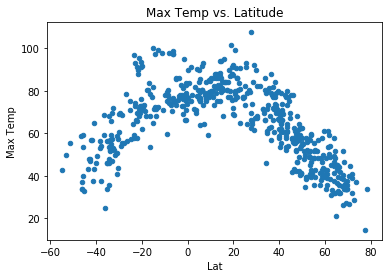

In [52]:
clean_city_df.plot('Lat','Max Temp',  kind = 'scatter')

plt.title('Max Temp vs. Latitude')


plt.savefig('../output_data/tempvslat.png')
plt.show()

## Latitude vs. Humidity Plot

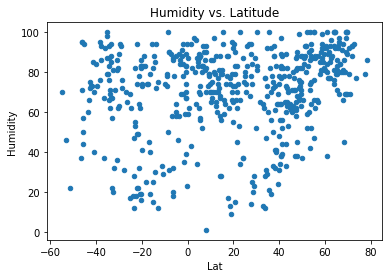

In [53]:
clean_city_df.plot('Lat','Humidity',  kind = 'scatter')

plt.title('Humidity vs. Latitude')

plt.savefig('../output_data/humidityvslat.png')
plt.show()

## Latitude vs. Cloudiness Plot

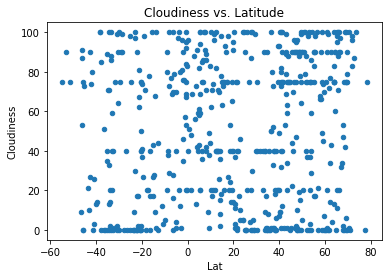

In [54]:
clean_city_df.plot('Lat','Cloudiness',  kind = 'scatter')

plt.title('Cloudiness vs. Latitude')

plt.savefig('../output_data/cloudsvslat.png')
plt.show()

## Latitude vs. Wind Speed Plot

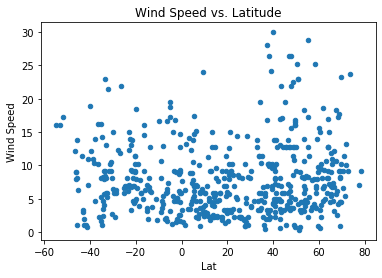

In [55]:
clean_city_df.plot('Lat','Wind Speed',  kind = 'scatter')

plt.title('Wind Speed vs. Latitude')

plt.savefig('../output_data/windvslat.png')
plt.show()

## Linear Regression

In [149]:
#Function seperates df by latitude, then plots and does regression upon measue provided

def linfunc(df, measure):
    
    #Northern Portion
    
    northern = df.loc[df['Lat']>0]
    x_values = northern['Lat']
    y_values = northern[measure]

    fig1, axn = plt.subplots()
    axn.scatter(x_values, y_values, color = 'black')
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values,y_values)
    regress = [(val*slope)+intercept for val in x_values]
    plt.xlabel('Latitude')
    plt.ylabel(measure)
    axn.plot(x_values, regress, color='red')
    axn.annotate(f"Line Equation = {round(slope, 3)}x + {round(intercept, 3)}", (x_values.min()+10,y_values.min()+10), color = 'red', size = 15)
    plt.title('Northern Hemisphere')
    plt.savefig(f'../output_data/NORTH{measure} regress.png')
    
    #Southern Portion
    
    southern = df.loc[df['Lat']<0]
    x_values = southern['Lat']
    y_values = southern[measure]
    fig2, axs = plt.subplots()
    axs.scatter(x_values, y_values, color = 'black')
    plt.title('Southern Hemisphere')
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values,y_values)
    regress = [(val*slope)+intercept for val in x_values]
    plt.xlabel('Latitude')
    plt.ylabel(measure)
    axs.plot(x_values, regress, color='red')
    axs.annotate(f"Line Equation = {round(slope, 3)}x + {round(intercept, 3)}", (x_values.min()+10,y_values.min()+10), color = 'red', size = 15)
    plt.savefig(f'../output_data/SOUTH{measure} regress.png')
    return
    
    
    


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

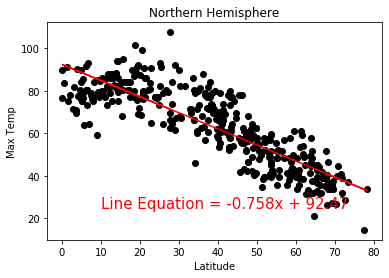

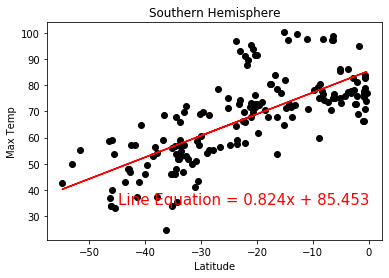

In [150]:
linfunc(city_df, 'Max Temp')

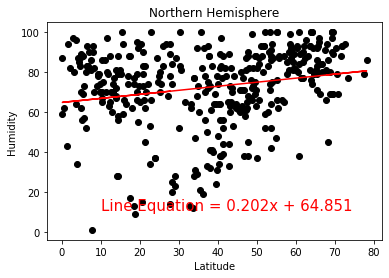

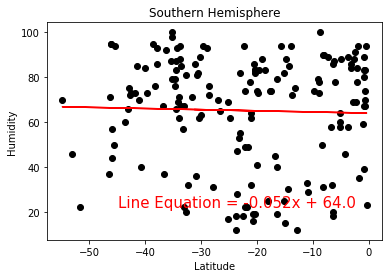

In [151]:
linfunc(city_df, 'Humidity')

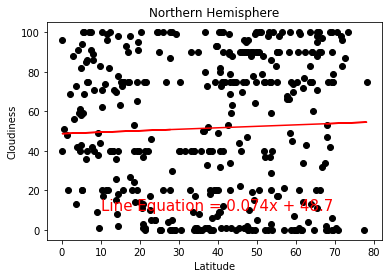

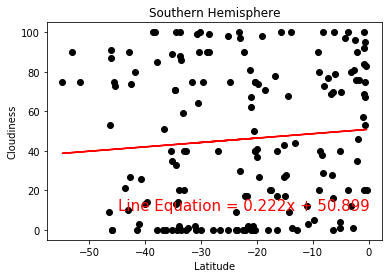

In [152]:
linfunc(city_df, 'Cloudiness')

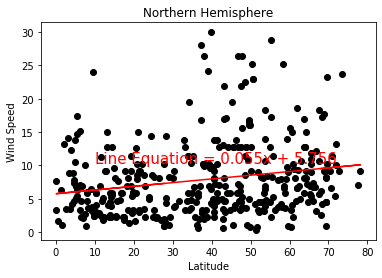

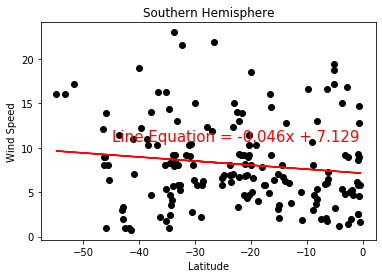

In [153]:
linfunc(city_df, 'Wind Speed')